In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [2]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head()

,Unnamed: 0,Speaker,Text,Episode,Scene
0,0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,Speaker,Text,Episode,Scene
0,monica,"oh, the way you crushed mike at ping pong was...",1001,"[scene barbados, monica and chandler's room. t..."
1,chandler,"you know, i'd love to, but i'm a little tired.",1001,"[scene barbados, monica and chandler's room. t..."
2,monica,i'll put a pillowcase over my head.,1001,"[scene barbados, monica and chandler's room. t..."
3,chandler,you're on!,1001,"[scene barbados, monica and chandler's room. t..."
4,phoebe,hey!,1001,"[scene barbados, monica and chandler's room. t..."


In [6]:
FreqDist(df["Speaker"]).most_common(10)

[('ross', 9145),
 ('rachel', 9124),
 ('chandler', 8367),
 ('monica', 8283),
 ('joey', 8200),
 ('phoebe', 7355),
 ('mike', 363),
 ('all', 326),
 ('richard', 254),
 ('mr. geller', 229)]

In [9]:
#joey = joe, rachel = rach, monica = mon, phoebe = phoebs = phoeb
mainch = ["joe","rach","ross","chandler","mon","phoeb"]

In [10]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [11]:
#Create list for what characters says. allsays[0] is what joey says, allsays[5] is phoebe
allsays = list()
for character in mainch:
    says = df.Text[df['Speaker'].str.match(character)].reset_index(drop=True)
    sayscont = list()
    for i in range(len(says)):
        sayscont.extend(cleanLines(says[i]))
    allsays.append(sayscont)

In [12]:
len(allsays)

6

In [13]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)


In [14]:
len(allsays[0])

8321

We can see that Joey in the FreqDist fuction has 8200 lines but in the created list, he has 8321. One of the reasons for this is that there is characters such as "Joey's co-star" who has 10 lines, that gets mistaken for Joey in our code. Furthermore Joey has lines together with other characters that also gets attached to his lines

In [15]:
#Create list for all words
allwords = list()

#Create list for character
joeysays = []
for i in range(len(allsays[0])):
    words = [w for w in allsays[0][i].split() if w not in stopWords]
    joeysays.extend(words)

allwords.extend(joeysays)

In [16]:
n = 1
rachelsays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    rachelsays.extend(words)
allwords.extend(rachelsays)

n+=1
rosssays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    rosssays.extend(words)
allwords.extend(rosssays)
    
n+=1
chandlersays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    chandlersays.extend(words)
allwords.extend(chandlersays)

n+=1
monicasays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    monicasays.extend(words)
allwords.extend(monicasays)

n+=1
phoebesays = []
for i in range(len(allsays[n])):
    words = [w for w in allsays[n][i].split() if w not in stopWords]
    phoebesays.extend(words)
allwords.extend(phoebesays)


In [17]:
print("Most frequent words for Joey",FreqDist(joeysays).most_common(10))
longWords = []
for i in range(len(joeysays)):
    longWords.extend([w for w in joeysays[i].split() if len(w) > 14])
print("Long words that Joey says",sorted(longWords))

Most frequent words for Joey [('right', 662), ('look', 379), ('go', 334), ('one', 317), ('ross', 313), ('really', 300), ('think', 298), ('good', 278), ('come', 278), ('yknow', 274)]
Long words that Joey says ['andandandandand', 'andandandandandand', 'andreaangelaandrea', 'chicagosoundtrack', 'closenessshmoshness', 'commitmentminded', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'greatgreatgranddaughter', 'greatgreatgranddaughter', 'greatgreatgranddaughter', 'hmmmmmmmmmmmmmm', 'iforgottenstates', 'knucklecracking', 'looklooklooklook', 'looklooklooklooklook', 'looklooklooklooklook', 'misunderstanding', 'monicamonicamonicamonica', 'nononononononono', 'phlegmphlegmphlegm', 'pigintheblanket', 'responsibilities', 'rossrossrossross', 'seventeenfourteen', 'suddenlysuddenly', 'superintendents', 'superintendents', 'thatthatbananameat', 'uncomprehending', 'waitwaitwaitwait', 'waitwaitwaitwai

In [18]:
theysay = rachelsays
print("Most frequent words for Rachel",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Rachel says",sorted(longWords))

Most frequent words for Rachel [('right', 553), ('ross', 536), ('god', 473), ('yknow', 451), ('really', 450), ('mean', 424), ('think', 373), ('go', 365), ('hi', 364), ('joey', 330)]
Long words that Rachel says ['anastassakispapasifakis', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'congratulatioooons', 'embarrassingbut', 'everylittlething', 'fashionimpaired', 'goooooooddddddd', 'heywhoawhoawhoa', 'ifoundoutiwasgonnahaveemma', 'imovedtonewyork', 'kickyouinthecrotch', 'kiddingseriously', 'kittykittykitty', 'kittykittykittykitty', 'looklooklooklooklook', 'misunderstanding', 'multifunctional', 'okayokayokayokayokayokayokay', 'palaeontologist', 'responsibilities', 'rockpaperscissors', 'rockpaperscissors', 'seriouslyseriously', 'seriousserserseriously', 'sicksicksicksick', 'somemeaningless', 'thatsyknowthatsweve', 'theyretheyretheyre', 'transponcetranspondster', 'tra

In [19]:
theysay = rosssays
print("Most frequent words for Ross",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Ross says",sorted(longWords))

Most frequent words for Ross [('right', 510), ('mean', 391), ('go', 391), ('think', 356), ('really', 350), ('look', 345), ('yknow', 300), ('see', 292), ('come', 292), ('want', 284)]
Long words that Ross says ['ahhhhhhhhhhhhhh', 'anthropologically', 'anthropologists', 'antidepressants', 'apartmentalthough', 'australopithicus', 'australopithicus', 'bahbahbhabhannn', 'bitemebitemebitemebiteme', 'boscodictiasaur', 'condescendingly', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'electromagnetic', 'feesensenstenlger', 'friendphyllistake', 'gellerwillickbunch', 'interdepartmental', 'lalalalalalalalalala', 'maybekindawanted', 'mboscodictiosaur', 'minimarshmallow', 'mississippilesly', 'misunderstanding', 'mwwwooooohahhah', 'paleontological', 'paleontologists', 'paleontologists', 'paleontologists', 'rememberremember', 'shushshushshhst', 'surprisedgoodbye', 'thatsthatsthats', 'turnedtwentyeight', 'uheveryonethisis', 'uhhhhhhthatthat', 'ummclickclocken', 'whatswhatsw

In [20]:
theysay = phoebesays
print("Most frequent words for Phoebe",FreqDist(theysay).most_common(10))
longWords = []
for i in range(len(theysay)):
    longWords.extend([w for w in theysay[i].split() if len(w) > 14])
print("Long words that Phoebe says",sorted(longWords))

Most frequent words for Phoebe [('right', 404), ('really', 366), ('yknow', 342), ('go', 295), ('ok', 288), ('one', 281), ('god', 276), ('think', 252), ('good', 246), ('look', 234)]
Long words that Phoebe says ['abouteverything', 'congratulations', 'congratulations', 'congratulations', 'congratulations', 'headacheheadache', 'icknecktreeanis', 'interchangeable', 'internationally', 'lightningbearer', 'maintenanceokay', 'massageyourselfathomeworkshop', 'mustardtastrophe', 'needlessturkeymurder', 'paleonthologist', 'paleontologists', 'phoebephoebephoebephoebeburrrrr', 'playingformoney', 'thanksforalovelyevening', 'themnotlikingyouextravaganza', 'thirtysomething', 'threedimensional', 'unpredictability', 'waitwaitwaitwait', 'whatwhatwhatwhatwhat', 'yellowbelliedlillylivereddraw', 'youreyoureyoure']


In [21]:
# Calculate the TF of the characters:
theysay = joeysays
TF_joey_words = FreqDist(theysay)
TF_joey = {a:(b/len(theysay)) for (a,b) in TF_joey_words.most_common()}
# Calculate the TF
TF_joey_words = FreqDist(theysay)
TF_joey = {a:(b/len(theysay)) for (a,b) in TF_joey_words.most_common()}

theysay = rachelsays
TF_rac_words = FreqDist(theysay)
TF_rac = {a:(b/len(theysay)) for (a,b) in TF_rac_words.most_common()}
# Calculate the TF
TF_rac_words = FreqDist(theysay)
TF_rac = {a:(b/len(theysay)) for (a,b) in TF_rac_words.most_common()}

theysay = rosssays
TF_ross_words = FreqDist(theysay)
TF_ross = {a:(b/len(theysay)) for (a,b) in TF_ross_words.most_common()}
# Calculate the TF
TF_ross_words = FreqDist(theysay)
TF_ross = {a:(b/len(theysay)) for (a,b) in TF_ross_words.most_common()}

theysay = chandlersays
TF_cha_words = FreqDist(theysay)
TF_cha = {a:(b/len(theysay)) for (a,b) in TF_cha_words.most_common()}
# Calculate the TF
TF_cha_words = FreqDist(theysay)
TF_cha = {a:(b/len(theysay)) for (a,b) in TF_cha_words.most_common()}

theysay = monicasays
TF_mon_words = FreqDist(theysay)
TF_mon = {a:(b/len(theysay)) for (a,b) in TF_mon_words.most_common()}
# Calculate the TF
TF_mon_words = FreqDist(theysay)
TF_mon = {a:(b/len(theysay)) for (a,b) in TF_mon_words.most_common()}

theysay = phoebesays
TF_pho_words = FreqDist(theysay)
TF_pho = {a:(b/len(theysay)) for (a,b) in TF_pho_words.most_common()}
# Calculate the TF
TF_pho_words = FreqDist(theysay)
TF_pho = {a:(b/len(theysay)) for (a,b) in TF_pho_words.most_common()}


In [22]:
# Calculate the IDF for each word:
IDF = {}
for word in np.unique(allwords):
    denomi = 0
    if word in joeysays: 
        denomi+=1
    if word in rachelsays: 
        denomi+=1
    if word in rosssays: 
        denomi+=1
    if word in chandlersays: 
        denomi+=1
    if word in monicasays: 
        denomi+=1
    if word in phoebesays: 
        denomi+=1

    IDF[word] = np.log( 2 / (denomi))

In [23]:
# Calcualte the TF-IDF of the characters:
#Joey
TF_IDF_joey = {}
for word in TF_joey.items():
    TF_IDF_joey[word[0]] = word[1] * IDF[word[0]]
TF_IDF_joey = sorted(TF_IDF_joey.items(), key=lambda kv: kv[1],reverse = True)

#Rachel
TF_IDF_rac = {}
for word in TF_rac.items():
    TF_IDF_rac[word[0]] = word[1] * IDF[word[0]]
TF_IDF_rac = sorted(TF_IDF_rac.items(), key=lambda kv: kv[1],reverse = True)

#Ross
TF_IDF_ross = {}
for word in TF_ross.items():
    TF_IDF_ross[word[0]] = word[1] * IDF[word[0]]
TF_IDF_ross = sorted(TF_IDF_ross.items(), key=lambda kv: kv[1],reverse = True)

#Chandler
TF_IDF_cha = {}
for word in TF_cha.items():
    TF_IDF_cha[word[0]] = word[1] * IDF[word[0]]
TF_IDF_cha = sorted(TF_IDF_cha.items(), key=lambda kv: kv[1],reverse = True)

#Monica
TF_IDF_mon = {}
for word in TF_mon.items():
    TF_IDF_mon[word[0]] = word[1] * IDF[word[0]]
TF_IDF_mon = sorted(TF_IDF_mon.items(), key=lambda kv: kv[1],reverse = True)

#Phoebe
TF_IDF_pho = {}
for word in TF_pho.items():
    TF_IDF_pho[word[0]] = word[1] * IDF[word[0]]
TF_IDF_pho = sorted(TF_IDF_pho.items(), key=lambda kv: kv[1],reverse = True)


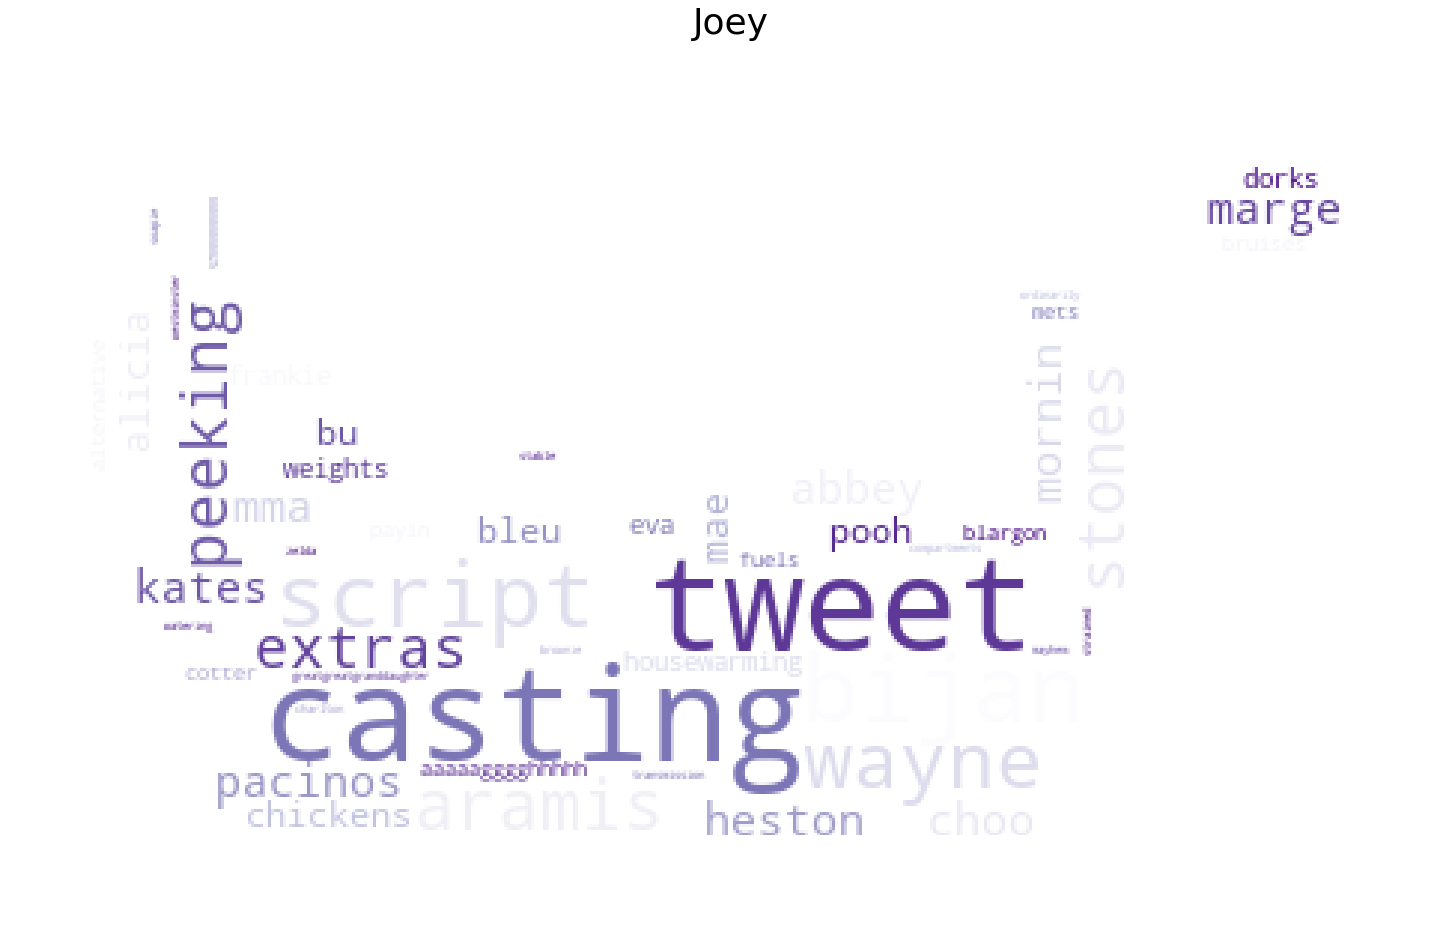

In [24]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/figures/Friends_siluet.PNG"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)))


plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'Purples',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_joey)));
plt.axis('off');
plt.title('Joey',fontsize = 36);
#plt.savefig("wordcloud_Joey")
plt.show()

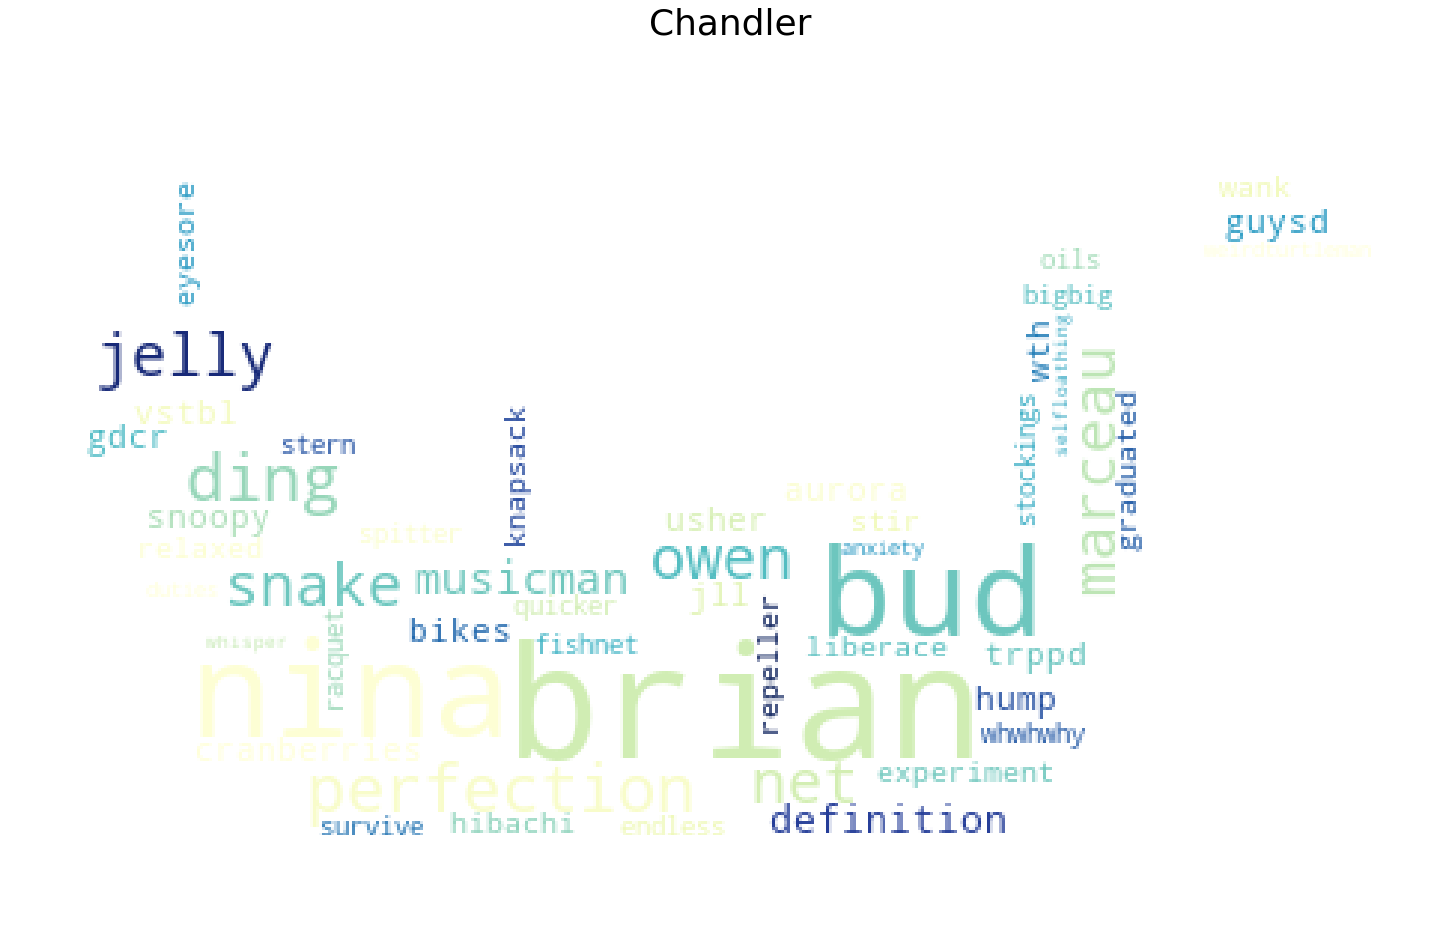

In [25]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'YlGnBu',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_cha)));
plt.axis('off');
plt.title('Chandler',fontsize = 36);
#plt.savefig("wordcloud_Chandler")
plt.show()

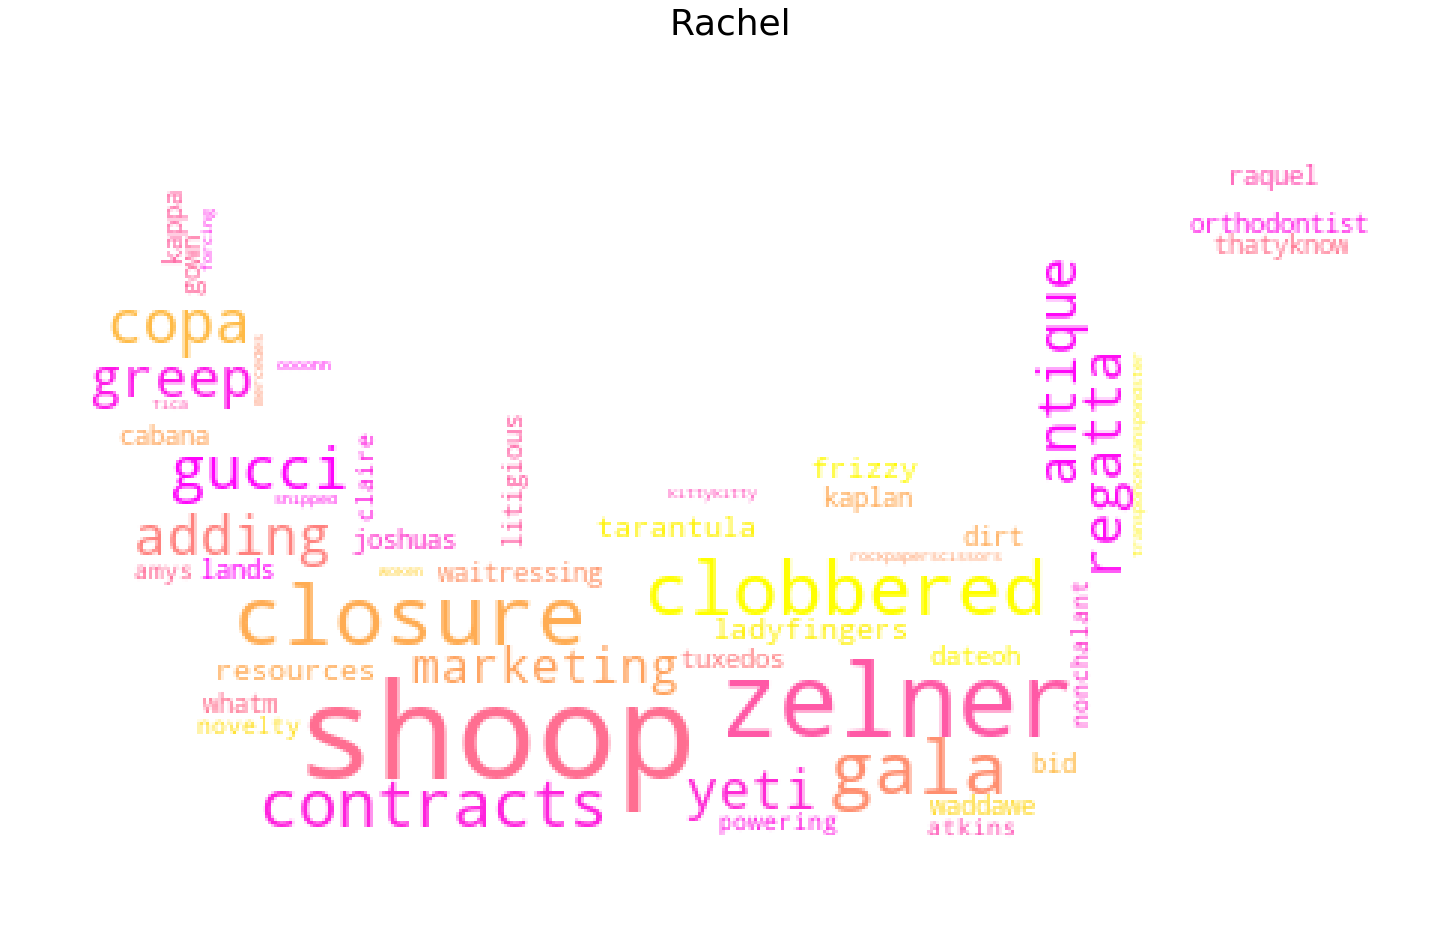

In [26]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'spring',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_rac)));
plt.axis('off');
plt.title('Rachel',fontsize = 36);
#plt.savefig("wordcloud_Rachel")
plt.show()

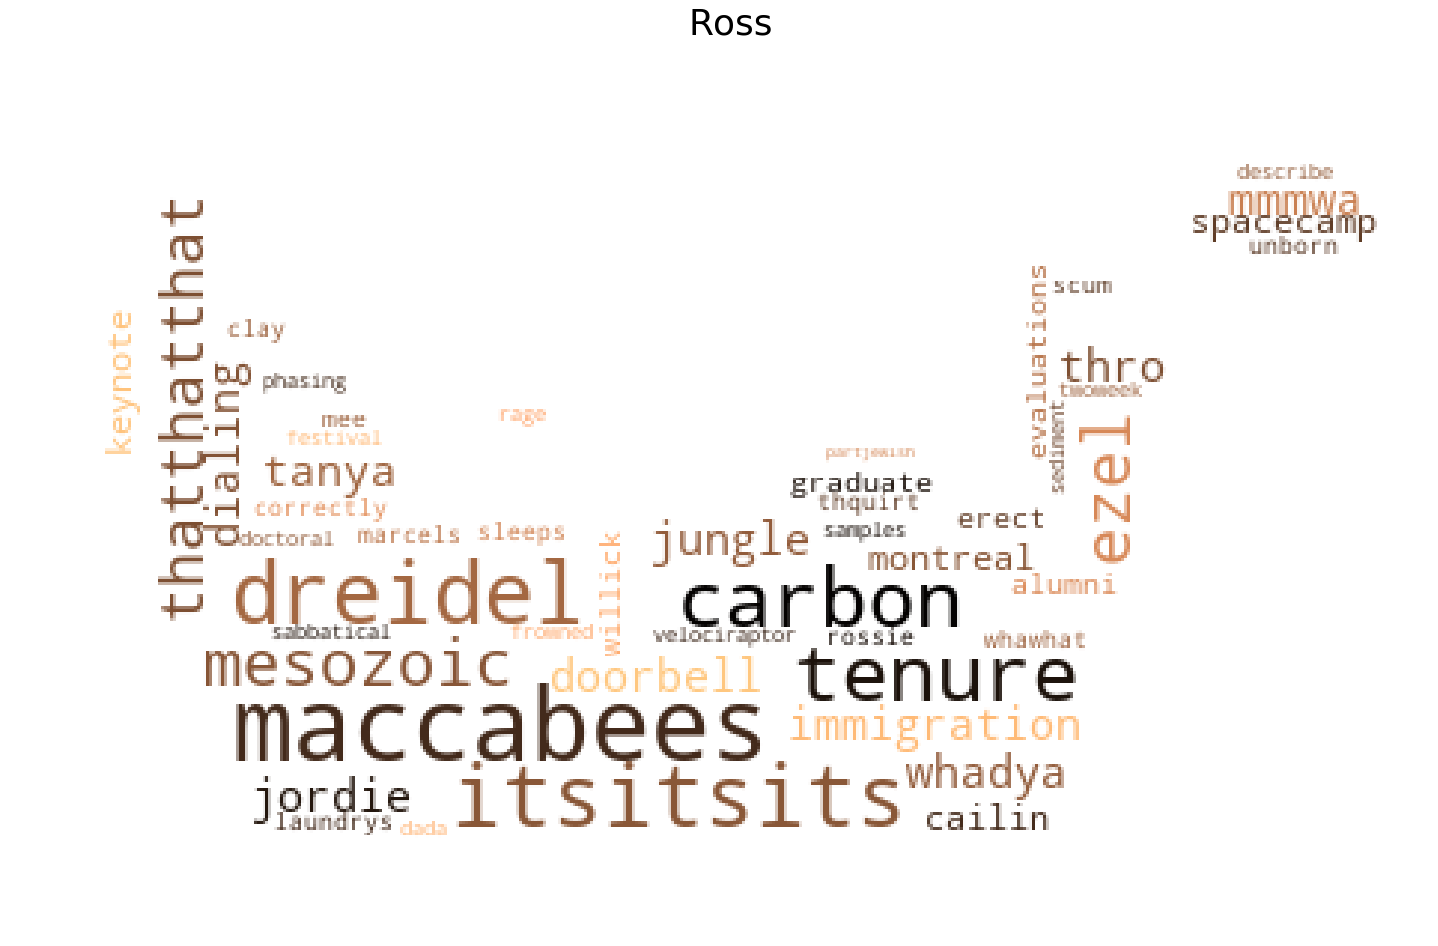

In [27]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'copper',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_ross)));
plt.axis('off');
plt.title('Ross',fontsize = 36);
#plt.savefig("wordcloud_Ross")
plt.show()

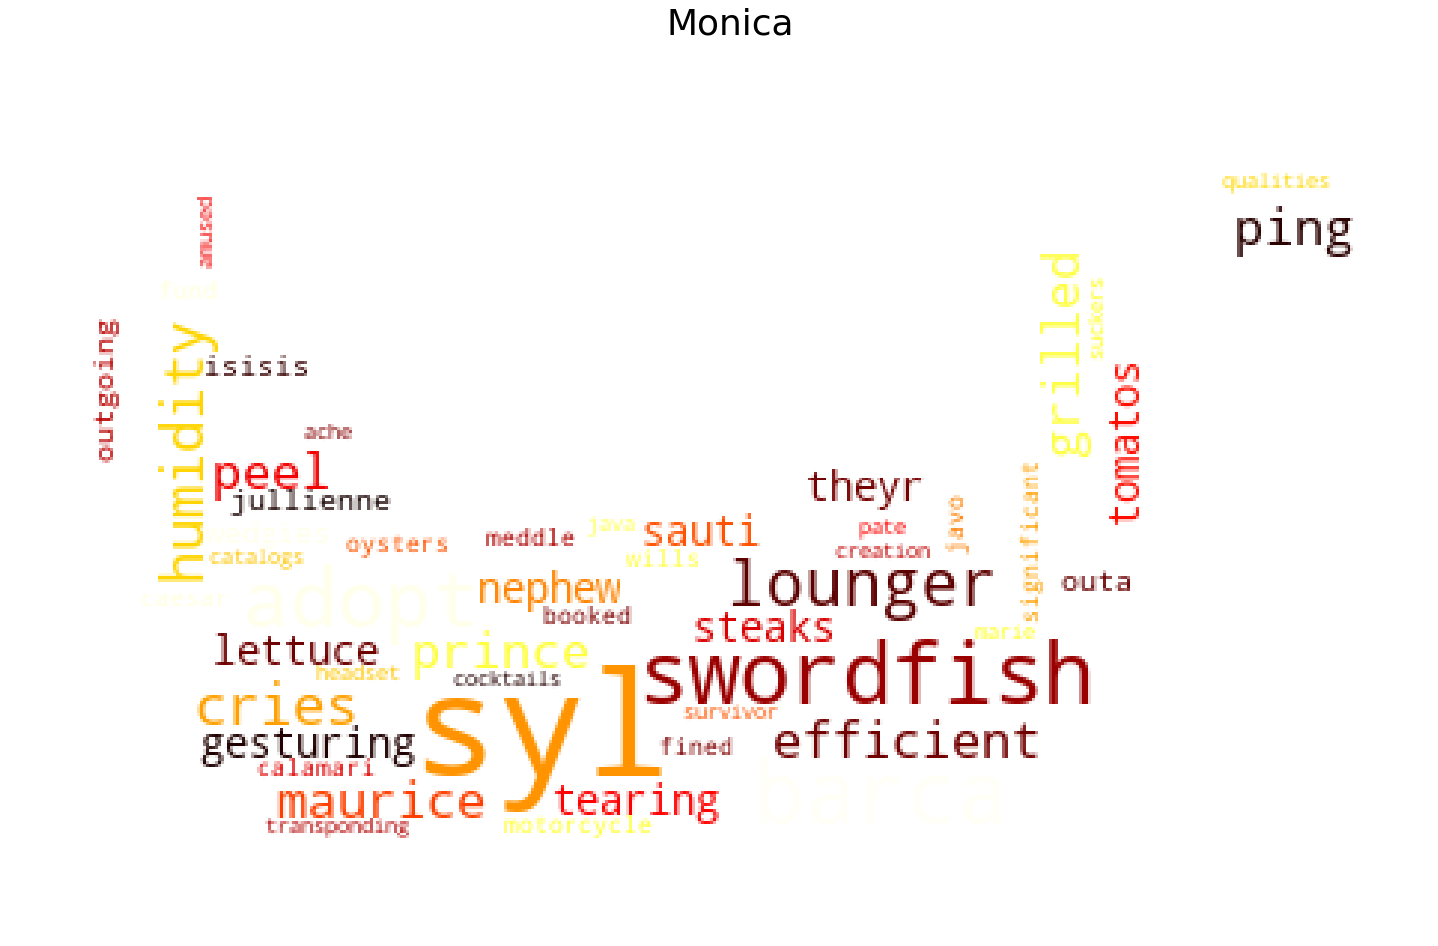

In [28]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'hot',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_mon)));
plt.axis('off');
plt.title('Monica',fontsize = 36);
#plt.savefig("wordcloud_Monica")
plt.show()

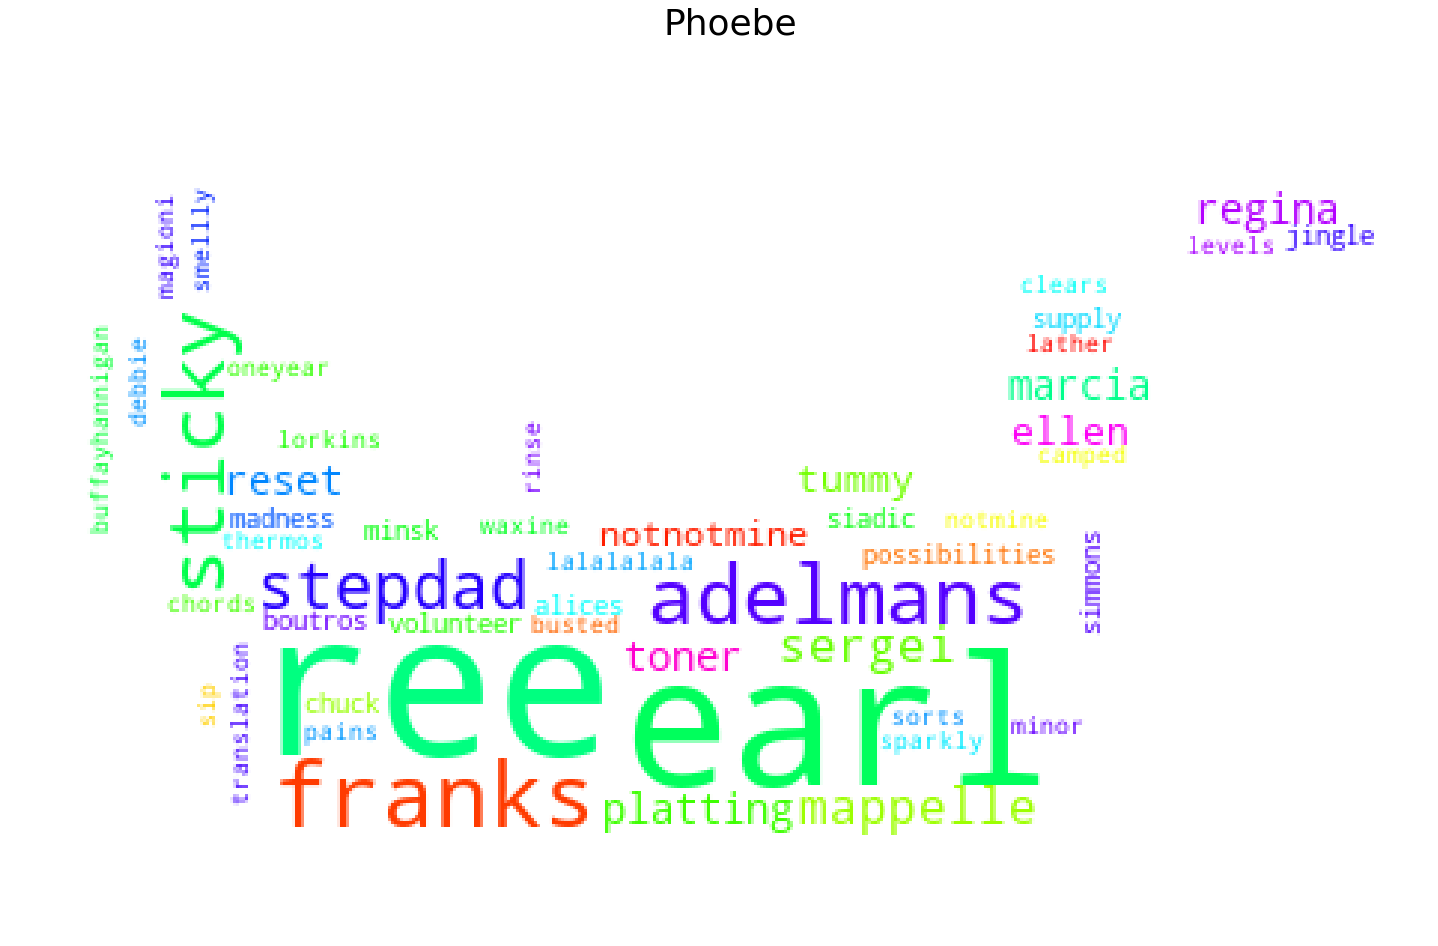

In [29]:
plt.figure(figsize = [25,25])
plt.imshow(WordCloud(stopwords=set(list(STOPWORDS) + stopWords),
                     background_color='white',
                     max_words = 50, colormap = 'hsv',
                    mask = img)
           .generate_from_frequencies(dict(TF_IDF_pho)));
plt.axis('off');
plt.title('Phoebe',fontsize = 36);
#plt.savefig("wordcloud_Phoebe")
plt.show()

Wordlists:
joeysays
rachelsays
rosssays
chandlersays
monicasays
phoebesays